In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
!pip install tensorflow==2.1.0


In [0]:
pip install --upgrade pip

In [1]:
from google.colab import  drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
ERROR! Session/line number was not unique in database. History logging moved to new session 67


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow import keras


import numpy as np
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline 

print(tf.__version__)




1.15.0


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/finger.zip"

In [0]:
from zipfile import ZipFile
file_name = "finger.zip"

with ZipFile(file_name,'r')as zip:
  zip.extractall()


In [0]:
import cv2
import os

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "One" in file_name else 2 if "Two" in file_name else 3 if "Three" in file_name else 4 if "Four" in file_name else 5 if "Five" in file_name else 0



In [0]:
def preprocess_image(img, side=128):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

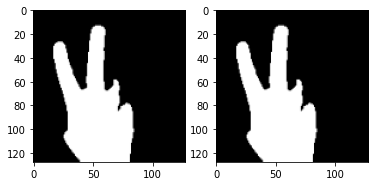

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline



train_path = "./r/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

def preprocess_image(img, side=128):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

preview_index = 1002
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [0]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [5]:
train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(12006, 128, 128, 1) (12006,)


In [0]:
X = train_images
y = train_labels

In [0]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (128, 128)), interpolation = 'nearest')
    plt.text(0, 7, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')

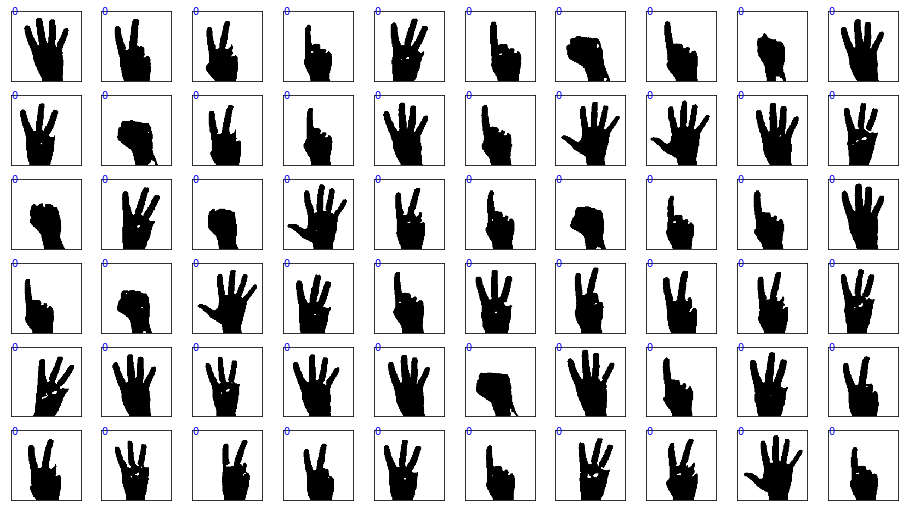

In [8]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (128, 128)), interpolation = 'nearest')
    plt.text(0, 7, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')
    
plt.figure(figsize = (16, 9))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
N_train = np.shape(X_train)
N_test = np.shape(X_test)
print(N_train, N_test)

(8044, 128, 128, 1) (3962, 128, 128, 1)


In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)

In [0]:
X_train = X_train.reshape(8044,1*128*128)
X_test = X_test.reshape(3962,1*128*128)

In [14]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

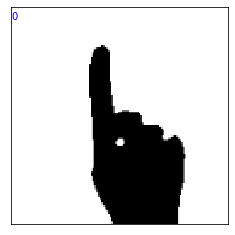

In [15]:
i = 16
Img = X_test[i, :]
dig = y_test[i]
draw_digit(Img, dig)

In [16]:
mlp_model.predict([Img])

array([0])

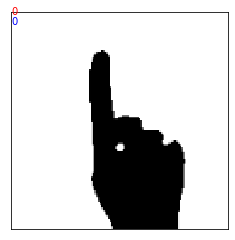

In [17]:
i = 16
Img = X_test[i, :]
dig = y_test[i]
dig_pred = mlp_model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

In [0]:

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [0]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0


In [0]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 1.0


In [0]:
print(1 - mlp_model.score(X_test, y_test))

NameError: ignored

In [0]:
train_error_cases = np.where(y_train != y_train_pred)
test_error_cases = np.where(y_test != y_test_pred)
print(train_error_cases, test_error_cases)

NameError: ignored